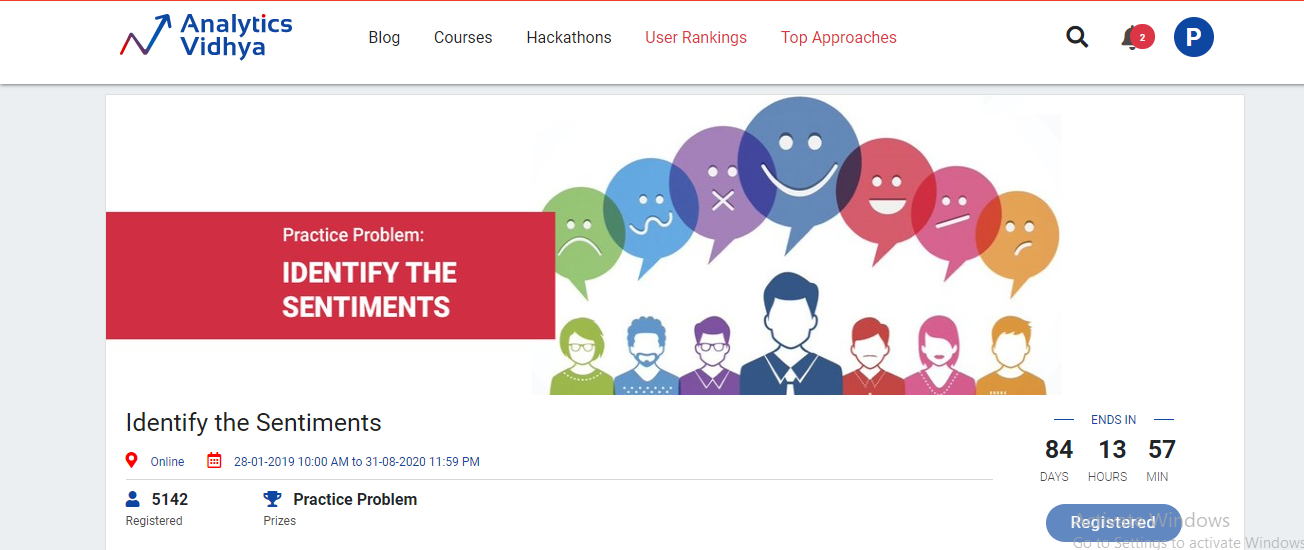

**Problem Statement** Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

 

Evaluation Metric
The metric used for evaluating the performance of classification model would be weighted F1-Score.

[AnalyticsVidyaHackathon_SourceLink](https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#ProblemStatement)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords') ###Downlodading ths stopwords module from NLTK
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
! pip install pyspellchecker 
from spellchecker import SpellChecker 
from sklearn.model_selection import train_test_split
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.getcwd()

'/content/gdrive/My Drive/Sentiment_Analysis'

In [ ]:
os.chdir("/content/gdrive/My Drive/Sentiment_Analysis")

In [ ]:
!ls

sample_submission.csv  test.csv  train.csv


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


## Text preprocessing
1. Regular expression
2. Stopwords removal
3. Stemming
4. Lemmatization
5. Removal of emojis
6. Lower Casing
7. Removal url tags
8. Removal of html tags
9. Spell correction

In [ ]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
train['tweet']=train['tweet'].astype(str)


In [ ]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
## Removal url from texts
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
## Removal of hmtl tags from texts
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)


In [ ]:
### Removal of Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
### Removal of punctuations
# Define a list of punctuation marks
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√']

In [ ]:
### Replacing punctuation with white spaces
def remov_punct(text):
  text=str(text)
  for punct in puncts:
    if punct in text:
      text=text.replace(punct,'')
  return text

In [ ]:

### Word tokenization
def word_tokenization(text):
    return [w.lower() for w in word_tokenize(text)]

In [ ]:
### Removal of stop words
def remove_stopwords(text):
  stop = stopwords.words('english')
  return[word.lower() for word in text if word.lower() not in stop]


In [ ]:
### Stemming operation
def stemProcess(text):
    ## instantiate PoterStemmer
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in text]

In [ ]:
##In Lemmatiztion we need to use POS tag to come up with correct Lemma. For this we need to map our dataset with wordnet, ### Just for reference
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') ### for map with wordnet POS

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]) ###pos[0] only first letter N,V,J, R from the pos tag
                                                                                                                          ### kay value pair



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train['tweet']

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(remove_urls)

In [ ]:
train['tweet']

0       #fingerprint #Pregnancy Test  #android #apps #...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(remove_html)

In [ ]:
train['tweet']

0       #fingerprint #Pregnancy Test  #android #apps #...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(remove_emoji)

In [ ]:
train['tweet']

0       #fingerprint #Pregnancy Test  #android #apps #...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(remov_punct)

In [ ]:
train['tweet']

0       fingerprint Pregnancy Test  android apps beaut...
1       Finally a transparant silicon case  Thanks to ...
2       We love this Would you go talk makememories un...
3       Im wired I know Im George I was made that way ...
4       What amazing service Apple wont even talk to m...
                              ...                        
7915    Live out loud lol liveoutloud selfie smile son...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my smart pocket wifi stay connecte...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(word_tokenization)


In [ ]:
train['tweet']

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, a, transparant, silicon, case, thank...
2       [we, love, this, would, you, go, talk, makemem...
3       [im, wired, i, know, im, george, i, was, made,...
4       [what, amazing, service, apple, wont, even, ta...
                              ...                        
7915    [live, out, loud, lol, liveoutloud, selfie, sm...
7916    [we, would, like, to, wish, you, an, amazing, ...
7917    [helping, my, lovely, 90, year, old, neighbor,...
7918    [finally, got, my, smart, pocket, wifi, stay, ...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(remove_stopwords)

In [ ]:
train['tweet']

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, would, go, talk, makememories, unplug, ...
3       [im, wired, know, im, george, made, way, iphon...
4       [amazing, service, apple, wont, even, talk, qu...
                              ...                        
7915    [live, loud, lol, liveoutloud, selfie, smile, ...
7916    [would, like, wish, amazing, day, make, every,...
7917    [helping, lovely, 90, year, old, neighbor, ipa...
7918    [finally, got, smart, pocket, wifi, stay, conn...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: tweet, Length: 7920, dtype: object

In [ ]:
train['tweet'] = train['tweet'].apply(stemProcess)

In [ ]:
train['tweet']

0       [fingerprint, pregnanc, test, android, app, be...
1       [final, transpar, silicon, case, thank, uncl, ...
2       [love, would, go, talk, makememori, unplug, re...
3       [im, wire, know, im, georg, made, way, iphon, ...
4       [amaz, servic, appl, wont, even, talk, questio...
                              ...                        
7915    [live, loud, lol, liveoutloud, selfi, smile, s...
7916    [would, like, wish, amaz, day, make, everi, mi...
7917    [help, love, 90, year, old, neighbor, ipad, mo...
7918    [final, got, smart, pocket, wifi, stay, connec...
7919    [appl, barcelona, appl, store, bcn, barcelona,...
Name: tweet, Length: 7920, dtype: object

In [ ]:
#train['tweet'] = train['tweet'].apply(correct_spell) ## checking spelling is  taking lon time and accuracy wise i didn't get much impact

In [ ]:
### Performing all the basic text preprocessing steps for test data as well
test['tweet'] = test['tweet'].apply(remove_urls)
test['tweet'] = test['tweet'].apply(remove_html)
test['tweet'] = test['tweet'].apply(remove_emoji)
test['tweet'] = test['tweet'].apply(remov_punct)
test['tweet'] = test['tweet'].apply(word_tokenization)
test['tweet'] = test['tweet'].apply(remove_stopwords)
test['tweet'] = test['tweet'].apply(stemProcess)


In [ ]:
## Set index for train and test data
train.set_index('id',inplace=True)
test.set_index('id',inplace=True)

In [ ]:
train.head(3)

,label,tweet
id,,
1,0,"[fingerprint, pregnanc, test, android, app, be..."
2,0,"[final, transpar, silicon, case, thank, uncl, ..."
3,0,"[love, would, go, talk, makememori, unplug, re..."


In [ ]:
test.head(3)

,tweet
id,
7921,"[hate, new, iphon, upgrad, wont, let, download..."
7922,"[current, shit, fuck, pant, appl, imac, cashmo..."
7923,"[id, like, put, cdrom, ipad, possibl, ye, woul..."


In [ ]:
### Splitting train and validation data into train_validation split

train_text,val_text,\
train_target,valid_target= train_test_split(train.drop('label',axis=1),train.drop('tweet',axis=1),
                                          test_size=0.2,random_state=1234)

In [ ]:
print(train_text.head())

                                                  tweet
id                                                     
7319  [ios8, brake, phone, appl, wont, except, seria...
1925  [chorizo, appl, sausag, roll, made, nice, past...
2639  [heheh, never, problem, use, window, media, pl...
3199  [applesupport, hateappl, could, make, refund, ...
7861  [dont, take, photograph, make, 50, capsul, col...


In [ ]:
print(val_text.head())

                                                  tweet
id                                                     
3306  [moment, go, contact, isnt, number, iphon, updat]
3383  [work, hard, work, hard, sun, durisim, sol, cr...
1130  [happi, look, like, americanpitbul, pitbullblu...
2059  [18, year, old, papa, samsung, live, laugh, li...
5702  [oliv, samsung, live, laugh, life, legoland, m...


In [ ]:
print(train_target.head())

      label
id         
7319      1
1925      0
2639      1
3199      1
7861      0


In [ ]:
print(valid_target.head())

      label
id         
3306      1
3383      0
1130      0
2059      0
5702      0


In [ ]:
### Converting the prepocess data of train and validation data into string which is the format given as input for model
def convertListToString(text):
    temp =[]
    for i in text:
        temp.append(i)
    return " ".join(temp)

In [ ]:
train_text['tweet']

id
7319    [ios8, brake, phone, appl, wont, except, seria...
1925    [chorizo, appl, sausag, roll, made, nice, past...
2639    [heheh, never, problem, use, window, media, pl...
3199    [applesupport, hateappl, could, make, refund, ...
7861    [dont, take, photograph, make, 50, capsul, col...
                              ...                        
3277    [thank, appl, forc, learn, tri, wing, screw, d...
7222     [ive, never, hate, updat, life, one, itun, appl]
1319    [sinc, updat, phone, earlier, gotten, slower, ...
724     [joe, biden, donald, trump, would, lead, news,...
2864    [gain, follow, rt, must, follow, follow, back,...
Name: tweet, Length: 6336, dtype: object

In [ ]:
train_text['tweet'] = train_text['tweet'].apply(convertListToString)


In [ ]:
train_text['tweet']

id
7319    ios8 brake phone appl wont except serial numbe...
1925    chorizo appl sausag roll made nice pastri appl...
2639    heheh never problem use window media player ma...
3199    applesupport hateappl could make refund visit ...
7861    dont take photograph make 50 capsul collect ca...
                              ...                        
3277    thank appl forc learn tri wing screw driver ch...
7222              ive never hate updat life one itun appl
1319         sinc updat phone earlier gotten slower freez
724     joe biden donald trump would lead news photogr...
2864    gain follow rt must follow follow back follow ...
Name: tweet, Length: 6336, dtype: object

In [ ]:
val_text['tweet'] = val_text['tweet'].apply(convertListToString)


In [ ]:
val_text['tweet']

id
3306            moment go contact isnt number iphon updat
3383    work hard work hard sun durisim sol crazi nolo...
1130    happi look like americanpitbul pitbullblu mexi...
2059    18 year old papa samsung live laugh life filch...
5702    oliv samsung live laugh life legoland malaysia...
                              ...                        
4458              ive got new phone samsung lafleur азаза
4598    hey new iphon xd sopretti iphon gold white iph...
573     follow capetownsup instagram sup surf fun cape...
5871    dear appl samsung learn make product better pe...
3103    gain follow rt must follow follow back follow ...
Name: tweet, Length: 1584, dtype: object

In [ ]:
test['tweet']

id
7921    [hate, new, iphon, upgrad, wont, let, download...
7922    [current, shit, fuck, pant, appl, imac, cashmo...
7923    [id, like, put, cdrom, ipad, possibl, ye, woul...
7924    [ipod, offici, dead, lost, pictur, video, 1d, ...
7925              [fight, itun, night, want, music, paid]
                              ...                        
9869    [samsunggalaxynote7, explod, burn, 6yearold, t...
9870    [avail, hoodi, check, iphon, case, music, disc...
9871    [goe, crack, right, across, screen, could, act...
9872    [codeofinterest, said, adob, big, time, may, w...
9873    [final, got, thanx, father, samsung, galaxi, s...
Name: tweet, Length: 1953, dtype: object

In [ ]:
test['tweet'] = test['tweet'].apply(convertListToString)

In [ ]:
test['tweet']

id
7921    hate new iphon upgrad wont let download app ug...
7922    current shit fuck pant appl imac cashmoney rad...
7923    id like put cdrom ipad possibl ye wouldnt bloc...
7924    ipod offici dead lost pictur video 1d 5so conc...
7925                     fight itun night want music paid
                              ...                        
9869    samsunggalaxynote7 explod burn 6yearold thank ...
9870          avail hoodi check iphon case music discount
9871    goe crack right across screen could actual pro...
9872    codeofinterest said adob big time may well inc...
9873    final got thanx father samsung galaxi s3 gift ...
Name: tweet, Length: 1953, dtype: object

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
## Create the transform function
vectorizer = TfidfVectorizer()

t0 = time()

# tokenize and build vocab
train_data  = vectorizer.fit_transform(train_text['tweet'])
validation_data = vectorizer.transform(val_text['tweet'])
test_data =vectorizer.transform(test['tweet'])

In [ ]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder

le_label = LabelEncoder()


train_target = le_label.fit_transform(train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
valid_target = le_label.transform(valid_target)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(train_data.shape)
print(train_target.shape)

(6336, 13820)
(6336,)


In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_data, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
### Get the predictions on train and validation data
predict_train=naive_bayes.predict(train_data)
predict_validation = naive_bayes.predict(validation_data)

In [ ]:
### Evaluation metrics
from sklearn.metrics import accuracy_score ## For getting accuracy value

## Display accuracy value for train data
print("Train Accuracy :",accuracy_score(train_target,predict_train))

Train Accuracy : 0.9196654040404041


In [ ]:
## Display  accuracy value for validation data
print("Validation Accuracy :",accuracy_score(valid_target,predict_validation))

Validation Accuracy : 0.8547979797979798


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
## Get confusion matrix for train data
confusion_matrix_train = confusion_matrix(train_target,predict_train)
print(confusion_matrix_train)

[[4617   97]
 [ 412 1210]]


In [ ]:
## Get confusion matrix for validation data
confusion_matrix_validation = confusion_matrix(valid_target, predict_validation)
print(confusion_matrix_validation)

[[1148   32]
 [ 198  206]]


In [ ]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9794229953330504


Train TPR:  0.7459926017262639


Train Accuracy:  0.9196654040404041


In [ ]:
Accuracy_validation=(confusion_matrix_validation[0,0]+confusion_matrix_validation[1,1])/(confusion_matrix_validation[0,0]+confusion_matrix_validation[0,1]+confusion_matrix_validation[1,0]+confusion_matrix_validation[1,1])
TNR_Validation= confusion_matrix_validation[0,0]/(confusion_matrix_validation[0,0] +confusion_matrix_validation[0,1])
TPR_Validation= confusion_matrix_validation[1,1]/(confusion_matrix_validation[1,0] +confusion_matrix_validation[1,1])

print("Validation TNR: ",TNR_Validation)
print("\n")
print("Validation TPR: ",TPR_Validation)
print("\n")
print("Validation Accuracy: ",Accuracy_validation)

Validation TNR:  0.9728813559322034


Validation TPR:  0.5099009900990099


Validation Accuracy:  0.8547979797979798


In [ ]:
temp = test_data.copy()
temp1 = temp.copy()
temp2 = test.copy()

In [ ]:
## Get the predictions on test data
y_pred = naive_bayes.predict(temp)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
temp2['label'] = le_label.inverse_transform(y_pred)


In [ ]:
temp2['label']

id
7921    1
7922    1
7923    1
7924    0
7925    0
       ..
9869    0
9870    0
9871    1
9872    0
9873    0
Name: label, Length: 1953, dtype: int64

In [ ]:
temp2.reset_index(inplace=True)

In [ ]:
to_submit_1 = temp2[['id', 'label']]

In [ ]:
to_submit_1.label.value_counts()

0    1617
1     336
Name: label, dtype: int64

In [ ]:
print(to_submit_1.shape)
print(test.shape)

(1953, 2)
(1953, 1)


In [ ]:
## store to_submit into csv file with name NaiveBayes 
to_submit_1.to_csv('NaiveBayes.csv',index = False)

In [ ]:
### Grid Search for Naivebayes
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
param_grid = [{'vect__ngram_range': [(1, 1), (1, 2)],
               'vect__use_idf': [True, False],
               'vect__norm': ['l1', 'l2'],
               'nb_clf__alpha': [1, 1e-1]}]

In [ ]:
nb_tfidf = Pipeline([('vect', vectorizer), 
                     ('nb_clf', MultinomialNB())])

In [ ]:
gs_nb_tfidf = GridSearchCV(nb_tfidf, 
                           param_grid,
                           scoring='accuracy',
                           cv=5, 
                           verbose=2,
                           n_jobs=1)

In [ ]:
gs_nb_tfidf.fit(train_text['tweet'], train_target)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=True, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=False 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=False, total=   0.1s
[CV] nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=False 
[CV]  nb_clf__alpha=1, vect__ngram_range=(1, 1), vect__norm=l1, vect__use_idf=False, total= 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   15.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
print('Best parameter set: %s ' % gs_nb_tfidf.best_params_)

Best parameter set: {'nb_clf__alpha': 0.1, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__use_idf': False} 


In [ ]:
print('CV Accuracy: %.3f' % gs_nb_tfidf.best_score_)

CV Accuracy: 0.892


In [ ]:
nb_clf = gs_nb_tfidf.best_estimator_
print('Validation Accuracy: %.3f' % nb_clf.score(val_text['tweet'], valid_target))

Validation Accuracy: 0.885


In [ ]:
test_predictions = gs_nb_tfidf.predict(test['tweet'])


In [ ]:
temp3 = test.copy()

In [ ]:
temp3['label'] = le_label.inverse_transform(test_predictions)

In [ ]:
temp3.reset_index(inplace=True)

In [ ]:
to_submit_1 = temp3[['id', 'label']]

In [ ]:
to_submit_1.label.value_counts()

0    1398
1     555
Name: label, dtype: int64

In [ ]:
print(to_submit_1.shape)
print(test.shape)

(1953, 2)
(1953, 1)


In [ ]:
## store to_submit into csv file with name naive Bayes Model 
to_submit_1.to_csv('NaiveBayes_GridSearch.csv',index = False)